In [3]:
import os
import pandas as pd
import re
from datetime import datetime

folder_paths = {
    '131': '/Users/lalithkonda/Desktop/images sdo/aia 131',
    '94': '/Users/lalithkonda/Desktop/images sdo/aia 94',
    '171': '/Users/lalithkonda/Desktop/images sdo/aia 171',
    '193': '/Users/lalithkonda/Desktop/images sdo/aia 193',
    '304': '/Users/lalithkonda/Desktop/images sdo/aia 304'
}

def parse_filename(filename):
    pattern = r"(\d{8})_(\d{6})_\d+_(\d{4})\.jpg"
    match = re.match(pattern, filename)
    if match:
        date_str = match.group(1)
        time_str = match.group(2)
        wavelength = match.group(3)
        dt = datetime.strptime(date_str + time_str, '%Y%m%d%H%M%S')
        return dt, int(wavelength)
    return None, None

data = []

for wavelength, folder_path in folder_paths.items():
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            dt, wl = parse_filename(filename)
            if dt and wl:
                data.append((filename, dt, wl))

df_aia = pd.DataFrame(data, columns=['Filename', 'Datetime', 'Wavelength'])

print("Unique wavelengths in the DataFrame:", df_aia['Wavelength'].unique())

def find_nearest_images(ref_timestamp, df, wavelengths):
    nearest_images = {}
    for wavelength in wavelengths:
        subset = df[df['Wavelength'] == wavelength]
        nearest_time = min(subset['Datetime'], key=lambda x: abs(x - ref_timestamp))
        nearest_image = subset[subset['Datetime'] == nearest_time]['Filename'].values[0]
        nearest_images[wavelength] = nearest_image
    return nearest_images

wavelengths = [131, 94, 171, 193, 304]

reference_wavelength = 131
reference_timestamps = df_aia[df_aia['Wavelength'] == reference_wavelength]['Datetime']

records = []

for ref_timestamp in reference_timestamps:
    nearest_images = find_nearest_images(ref_timestamp, df_aia, wavelengths)
    record = {'Reference Timestamp': ref_timestamp}
    for wl, filename in nearest_images.items():
        record[f'Filename_{wl}'] = filename
    records.append(record)

df_multichannel = pd.DataFrame(records)
print(df_multichannel)


Unique wavelengths in the DataFrame: [131  94 171 193 304]
    Reference Timestamp                  Filename_131  \
0   2024-05-02 02:35:32  20240502_023532_512_0131.jpg   
1   2024-05-03 18:54:44  20240503_185444_512_0131.jpg   
2   2024-05-03 13:25:32  20240503_132532_512_0131.jpg   
3   2024-05-01 19:26:32  20240501_192632_512_0131.jpg   
4   2024-05-02 15:15:32  20240502_151532_512_0131.jpg   
..                  ...                           ...   
495 2024-05-01 12:15:20  20240501_121520_512_0131.jpg   
496 2024-05-01 10:36:44  20240501_103644_512_0131.jpg   
497 2024-05-03 09:06:32  20240503_090632_512_0131.jpg   
498 2024-05-04 04:46:44  20240504_044644_512_0131.jpg   
499 2024-05-03 04:55:20  20240503_045520_512_0131.jpg   

                      Filename_94                  Filename_171  \
0    20240502_023436_512_0094.jpg  20240502_023634_512_0171.jpg   
1    20240503_185412_512_0094.jpg  20240503_185534_512_0171.jpg   
2    20240503_132512_512_0094.jpg  20240503_132722_512_

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [5]:
tstart = "2024-05-1 0:00"
tend = "2024-05-6 0:00"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

24 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-05-01 00:00:00.000 2024-05-01 23:59:59.999 ...     NOAA      flx1s
2024-05-02 00:00:00.000 2024-05-02 23:59:59.999 ...     NOAA      flx1s
2024-05-03 00:00:00.000 2024-05-03 23:59:59.999 ...     NOAA      flx1s
2024-05-04 00:00:00.000 2024-05-04 23:59:59.999 ...     NOAA      flx1s
2024-05-05 00:00:00.000 2024-05-05 23:59:59.999 ...     NOAA      flx1s
2024-05-06 00:00:00.000 2024-05-06 23:59:59.999 ...     NOAA      flx1s
2024-05-01 00:00:00.000 2024-05-01 23:59:59.999 ...     NOAA      avg1m
                    ...                     ... ...      ...        ...
2

In [6]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16), a.Resolution("flx1s"))
print(result_goes16)

Results from 1 Provider:

6 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-05-01 00:00:00.000 2024-05-01 23:59:59.999 ...     NOAA      flx1s
2024-05-02 00:00:00.000 2024-05-02 23:59:59.999 ...     NOAA      flx1s
2024-05-03 00:00:00.000 2024-05-03 23:59:59.999 ...     NOAA      flx1s
2024-05-04 00:00:00.000 2024-05-04 23:59:59.999 ...     NOAA      flx1s
2024-05-05 00:00:00.000 2024-05-05 23:59:59.999 ...     NOAA      flx1s
2024-05-06 00:00:00.000 2024-05-06 23:59:59.999 ...     NOAA      flx1s




In [7]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

In [8]:
from sunpy.timeseries import TimeSeries

files_goes16 = Fido.fetch(result_goes16)
file_goes15 = files_goes16[0]
goes_16 = TimeSeries(file_goes16)
goes_16


Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

 SunPy TimeSeries
 ----------------
 Observatory:			GOES-16
 Instrument:			<a href=https://www.swpc.noaa.gov/products/goes-x-ray-flux target="_blank">Unknown</a>
 Channel(s):			xrsa<br>xrsb<br>xrsa_quality<br>xrsb_quality<br>xrsa_primary_chan<br>xrsb_primary_chan
 Start Date:			2024-05-01 00:00:00
 End Date:			2024-05-01 23:59:59
 Center Date:			2024-05-01 11:59:59
 Resolution:			1.0 s
 Samples per Channel:		86400
 Data Range(s):		xrsa                6.62E-06<br>xrsb                4.31E-05<br>xrsa_quality        2.56E+02<br>xrsb_quality        2.56E+02<br>xrsa_primary_chan   2.54E+02<br>xrsb_primary_chan   2.54E+02
 Units:			dimensionless<br>W / m2
                                     xrsa          xrsb  xrsa_quality  \
 2024-05-01 00:00:00.047678  6.510953e-06  4.305314e-05             0   
 2024-05-01 00:00:01.047671  6.515288e-06  4.301524e-05             0   
 2024-05-01 00:00:02.047677  6.492615e-06  4.305700e-05             0   
 2024-05-01 00:00:03.047679  6.523917e-06  4.29631

In [9]:
import pandas as pd

dtype = {'xrsa': float, 'xrsb': float}

df = pd.read_csv('goes_data.csv', index_col=0, dtype=dtype)
print(df)


                                    xrsa      xrsb  xrsa_quality  \
2024-05-01 00:00:00.047678  6.510953e-06  0.000043             0   
2024-05-01 00:00:01.047671  6.515288e-06  0.000043             0   
2024-05-01 00:00:02.047677  6.492615e-06  0.000043             0   
2024-05-01 00:00:03.047679  6.523917e-06  0.000043             2   
2024-05-01 00:00:04.047683  6.489398e-06  0.000043             0   
...                                  ...       ...           ...   
2024-05-06 23:59:55.243572  6.633890e-07  0.000011             0   
2024-05-06 23:59:56.243574  6.622784e-07  0.000011             0   
2024-05-06 23:59:57.243575  6.558219e-07  0.000011             0   
2024-05-06 23:59:58.243580  6.428930e-07  0.000011             0   
2024-05-06 23:59:59.243582  6.666092e-07  0.000011             0   

                            xrsb_quality  xrsa_primary_chan  xrsb_primary_chan  
2024-05-01 00:00:00.047678             0                  1                  1  
2024-05-01 00:00:01.0

In [10]:
df['Time'] = pd.to_datetime(df.index)

df['Time'] = df['Time'].dt.floor('s')

df.set_index('Time', inplace=True)

def classify_solar_flare(xrsb):
    if xrsb >= 1e-4:
        return 'X'
    elif xrsb >= 1e-5:
        return 'M'
    elif xrsb >= 1e-6:
        return 'C'
    elif xrsb >= 1e-7:
        return 'B'
    else:
        return 'A'
df['solar_flare_class'] = df['xrsa'].apply(classify_solar_flare)
print(df)

                             xrsa      xrsb  xrsa_quality  xrsb_quality  \
Time                                                                      
2024-05-01 00:00:00  6.510953e-06  0.000043             0             0   
2024-05-01 00:00:01  6.515288e-06  0.000043             0             0   
2024-05-01 00:00:02  6.492615e-06  0.000043             0             0   
2024-05-01 00:00:03  6.523917e-06  0.000043             2             0   
2024-05-01 00:00:04  6.489398e-06  0.000043             0             0   
...                           ...       ...           ...           ...   
2024-05-06 23:59:55  6.633890e-07  0.000011             0             0   
2024-05-06 23:59:56  6.622784e-07  0.000011             0             0   
2024-05-06 23:59:57  6.558219e-07  0.000011             0             0   
2024-05-06 23:59:58  6.428930e-07  0.000011             0             0   
2024-05-06 23:59:59  6.666092e-07  0.000011             0             0   

                     xrs

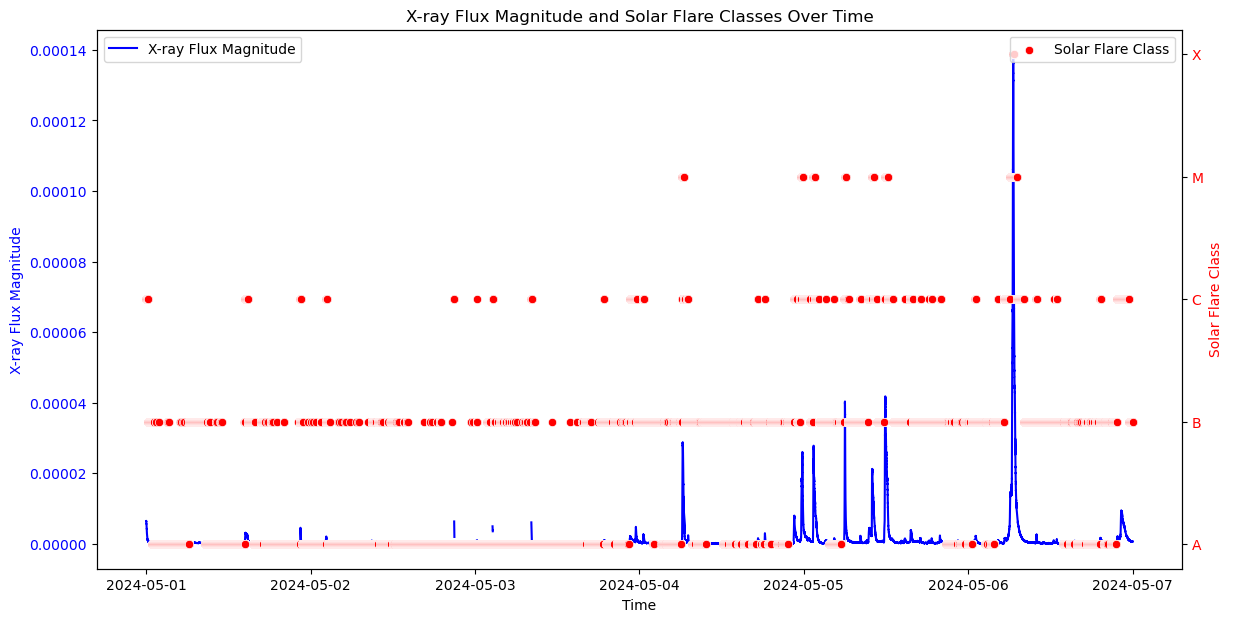

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df.index, df['xrsa'], color='b', label='X-ray Flux Magnitude')
ax1.set_xlabel('Time')
ax1.set_ylabel('X-ray Flux Magnitude', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

class_to_num = {'A': 1, 'B': 2, 'C': 3, 'M': 4, 'X': 5}
df['solar_flare_class_num'] = df['solar_flare_class'].map(class_to_num)

sns.scatterplot(data=df, x=df.index, y='solar_flare_class_num', ax=ax2, color='r', label='Solar Flare Class', marker='o')
ax2.set_ylabel('Solar Flare Class', color='r')
ax2.set_yticks(list(class_to_num.values()))
ax2.set_yticklabels(list(class_to_num.keys()))
ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('X-ray Flux Magnitude and Solar Flare Classes Over Time')
plt.show()

In [10]:
flare_class_counts = df['solar_flare_class'].value_counts()

print(flare_class_counts)
print(f"Total distinct flare classes: {flare_class_counts.count()}")


solar_flare_class
A    272763
B    192536
C     43825
M      8871
X       405
Name: count, dtype: int64
Total distinct flare classes: 5


In [11]:
def find_closest_flare_class(image_time, flare_data):
    time_diffs = abs(flare_data.index - image_time)
    closest_idx = time_diffs.argmin()
    return flare_data.iloc[closest_idx]['solar_flare_class']

df_multichannel['solar_flare_class'] = df_multichannel['Reference Timestamp'].apply(lambda x: find_closest_flare_class(x, df))


df_multichannel

,Reference Timestamp,Filename_131,Filename_94,Filename_171,Filename_193,Filename_304,solar_flare_class
0,2024-05-02 02:35:32,20240502_023532_512_0131.jpg,20240502_023436_512_0094.jpg,20240502_023634_512_0171.jpg,20240502_023705_512_0193.jpg,20240502_023854_512_0304.jpg,B
1,2024-05-03 18:54:44,20240503_185444_512_0131.jpg,20240503_185412_512_0094.jpg,20240503_185534_512_0171.jpg,20240503_185905_512_0193.jpg,20240503_185818_512_0304.jpg,B
2,2024-05-03 13:25:32,20240503_132532_512_0131.jpg,20240503_132512_512_0094.jpg,20240503_132722_512_0171.jpg,20240503_132805_512_0193.jpg,20240503_132830_512_0304.jpg,A
3,2024-05-01 19:26:32,20240501_192632_512_0131.jpg,20240501_192436_512_0094.jpg,20240501_192634_512_0171.jpg,20240501_192753_512_0193.jpg,20240501_192842_512_0304.jpg,A
4,2024-05-02 15:15:32,20240502_151532_512_0131.jpg,20240502_151448_512_0094.jpg,20240502_151734_512_0171.jpg,20240502_151805_512_0193.jpg,20240502_151918_512_0304.jpg,A
...,...,...,...,...,...,...,...
495,2024-05-01 12:15:20,20240501_121520_512_0131.jpg,20240501_121436_512_0094.jpg,20240501_121634_512_0171.jpg,20240501_121753_512_0193.jpg,20240501_121954_512_0304.jpg,A
496,2024-05-01 10:36:44,20240501_103644_512_0131.jpg,20240501_103436_512_0094.jpg,20240501_103534_512_0171.jpg,20240501_103753_512_0193.jpg,20240501_103854_512_0304.jpg,A
497,2024-05-03 09:06:32,20240503_090632_512_0131.jpg,20240503_090448_512_0094.jpg,20240503_090658_512_0171.jpg,20240503_090817_512_0193.jpg,20240503_090806_512_0304.jpg,A
498,2024-05-04 04:46:44,20240504_044644_512_0131.jpg,20240504_044436_512_0094.jpg,20240504_044658_512_0171.jpg,20240504_044817_512_0193.jpg,20240504_044930_512_0304.jpg,B


In [12]:
class_counts = df_multichannel['solar_flare_class'].value_counts()
print(class_counts)

solar_flare_class
A    376
B    105
C     17
M      2
Name: count, dtype: int64


In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
target_shape = (512, 512)

def load_image(folder_path, filename):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        image = cv2.resize(image, target_shape)
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image

def create_multichannel_image(record, folder_paths):
    channels = []
    for wavelength in folder_paths.keys():
        filename = record[f'Filename_{wavelength}']
        folder_path = folder_paths[wavelength]
        image = load_image(folder_path, filename)
        if image is not None:
            channels.append(image)
        else:
            print(f"Failed to load image: {filename}")
            return None
    if len(channels) == len(folder_paths):
        return np.stack(channels, axis=-1)
    else:
        print(f"Image channel mismatch for record: {record}")
        return None

In [14]:
X = []
y = []
for idx, record in df_multichannel.iterrows():
    multichannel_image = create_multichannel_image(record, folder_paths)
    if multichannel_image is not None and multichannel_image.shape == (target_shape[0], target_shape[1], len(folder_paths)):
        X.append(multichannel_image)
        y.append(record['solar_flare_class'])
    else:
        print(f"Skipping record at index {idx} due to shape mismatch or missing channel")

X = np.array(X)
y = np.array(y)
X = X / 255.0
class_mapping = {'A': 0, 'B': 1, 'C': 2, 'M': 3, 'X': 4}
y = to_categorical([class_mapping[cls] for cls in y], num_classes=5)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (500, 512, 512, 5)
Shape of y: (500, 5)


In [24]:
if len(X) == len(y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 5)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

    model.save('solar_flare_cnn_model.h5')
else:
    print("Mismatch in the number of images and labels.")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 118s 8s/step - accuracy: 0.6216 - loss: 3.6752 - val_accuracy: 0.7300 - val_loss: 0.9715
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 186s 12s/step - accuracy: 0.6687 - loss: 0.6786 - val_accuracy: 0.7700 - val_loss: 0.7095
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 131s 9s/step - accuracy: 0.7776 - loss: 0.6428 - val_accuracy: 0.7500 - val_loss: 0.6088
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 212s 11s/step - accuracy: 0.8021 - loss: 0.5504 - val_accuracy: 0.7900 - val_loss: 0.5776
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.8181 - loss: 0.5115 - val_accuracy: 0.7500 - val_loss: 0.6802
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 162s 10s/step - accuracy: 0.8403 - loss: 0.4802 - val_accuracy: 0.7500 - val_loss: 0.6274
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 11s/step - accuracy: 0.8314 - loss: 0.5050 - val_accuracy: 0.7600 - val_loss: 0.6326
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 137s 10s/step - accuracy: 0.8553 - loss: 0.4244 - val_accuracy: 0.780

Validation Accuracy: 82.00%


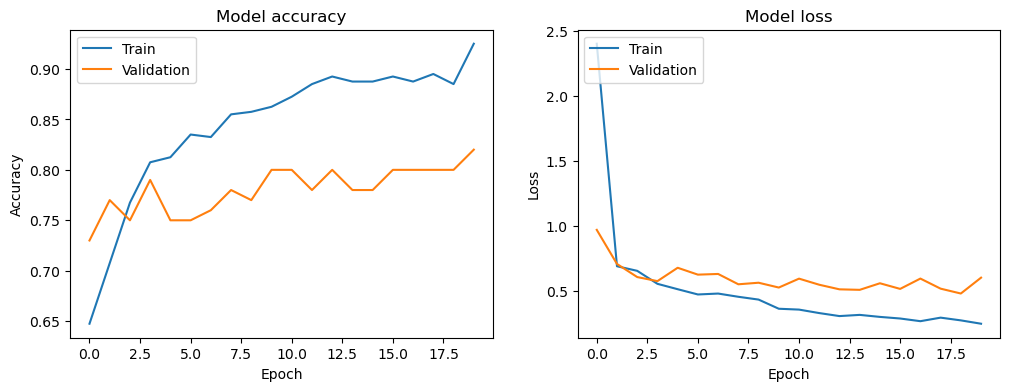

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


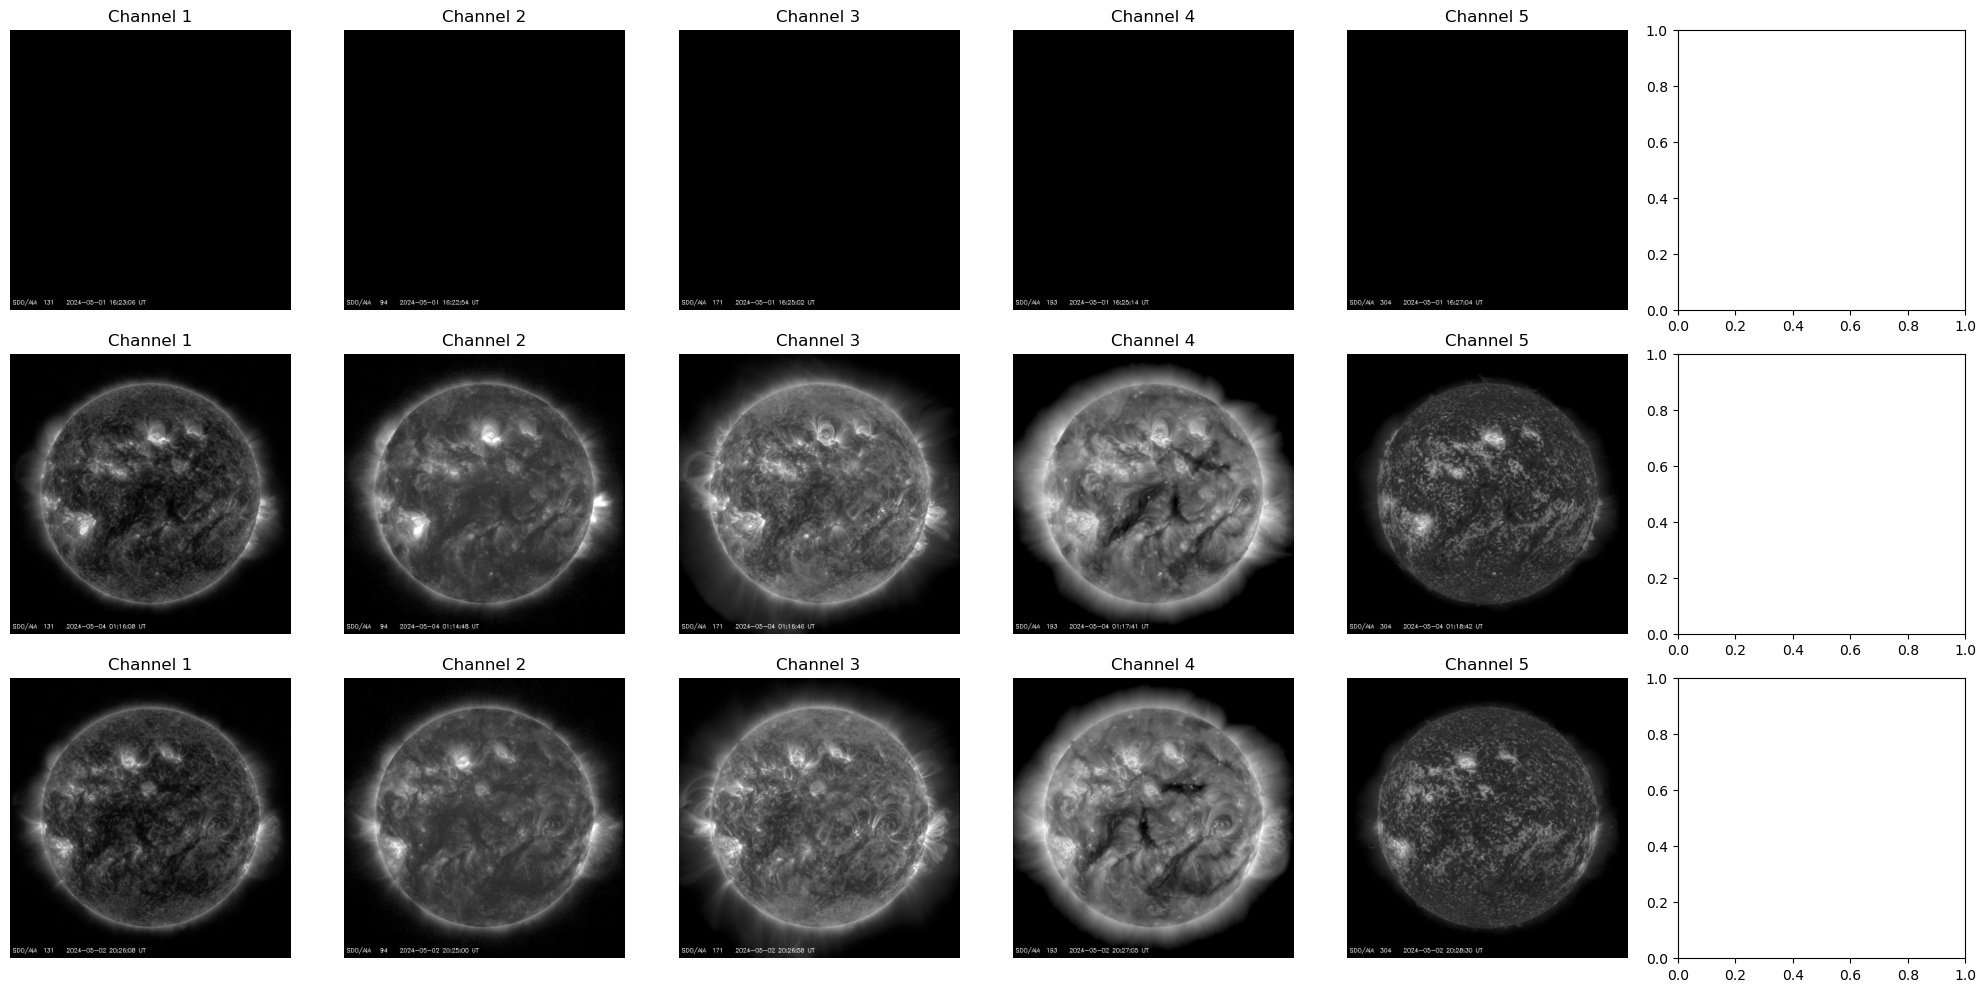

In [33]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'M', 4: 'X'}

num_samples = 3  
X_sample = X_val[:num_samples]
y_true = y_val[:num_samples]
y_pred_probs = model.predict(X_sample)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_true, axis=1)

fig, axes = plt.subplots(num_samples, 6, figsize=(20, 10))

for i in range(num_samples):
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(X_sample[i, :, :, j], cmap='gray')
        if j == 0:
            ax.set_ylabel(f"True: {class_labels[y_true[i]]}\nPred: {class_labels[y_pred[i]]}")
        ax.set_title(f'Channel {j+1}')
        ax.axis('off')
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 870ms/step
Unique classes in the validation set: [0 1 2]
Classification Report:
               precision    recall  f1-score   support

           A       0.91      0.90      0.90        77
           B       0.52      0.65      0.58        17
           C       0.67      0.33      0.44         6

    accuracy                           0.82       100
   macro avg       0.70      0.63      0.64       100
weighted avg       0.83      0.82      0.82       100



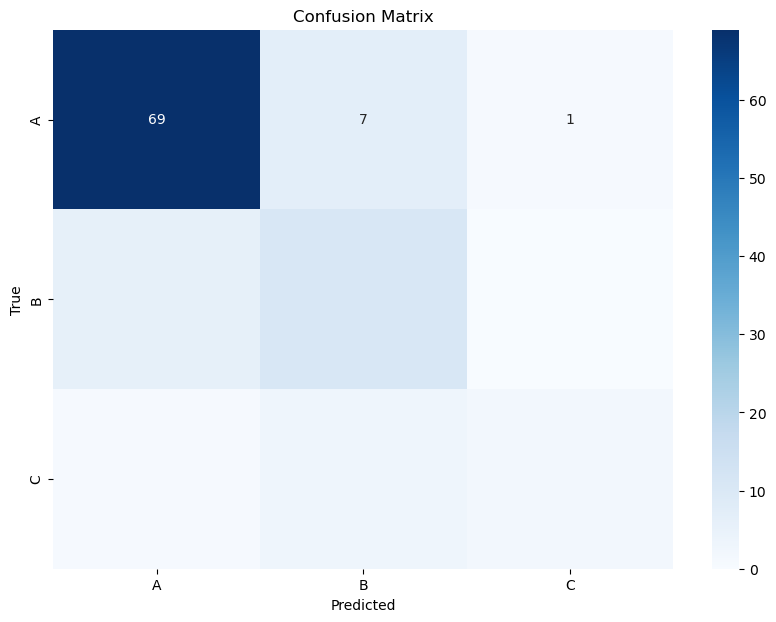

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'M', 4: 'X'}
class_names = ['A', 'B', 'C', 'M', 'X']

y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

unique_classes = np.unique(y_true)
print("Unique classes in the validation set:", unique_classes)

present_class_labels = {i: class_labels[i] for i in unique_classes}
present_class_names = [class_labels[i] for i in unique_classes]

conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_classes)

print("Classification Report:\n", classification_report(y_true, y_pred, labels=unique_classes, target_names=present_class_names))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=present_class_names, yticklabels=present_class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
import numpy as np

X_reshaped = X.reshape((X.shape[0], X.shape[3], X.shape[1], X.shape[2], 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=(5, 512, 512, 1)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(32, return_sequences=False))

model.add(Dense(5, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 5, 510, 510,    │           160 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 255, 255,    │             0 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 5, 1040400)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │   133,175,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,175,749 (508.03 MB)

 Trainable params: 133,175,749 (508.03 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)  
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 256s 6s/step - accuracy: 0.6681 - loss: 0.8061 - val_accuracy: 0.7000 - val_loss: 0.8593
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 263s 7s/step - accuracy: 0.7349 - loss: 0.7047 - val_accuracy: 0.7000 - val_loss: 0.8466
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.7638 - loss: 0.6462 - val_accuracy: 0.7000 - val_loss: 0.8362
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 281s 7s/step - accuracy: 0.7752 - loss: 0.6488 - val_accuracy: 0.7000 - val_loss: 0.8304
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.7542 - loss: 0.6645 - val_accuracy: 0.7000 - val_loss: 0.8243
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.7435 - loss: 0.6565 - val_accuracy: 0.7000 - val_loss: 0.8201
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.7469 - loss: 0.6962 - val_accuracy: 0.7000 - val_loss: 0.8189
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.7530 - loss: 0.6522 - val_accuracy: 0.7000 - v

In [21]:
predictions = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)  

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 972ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        77
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         6

    accuracy                           0.77       100
   macro avg       0.26      0.33      0.29       100
weighted avg       0.59      0.77      0.67       100



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


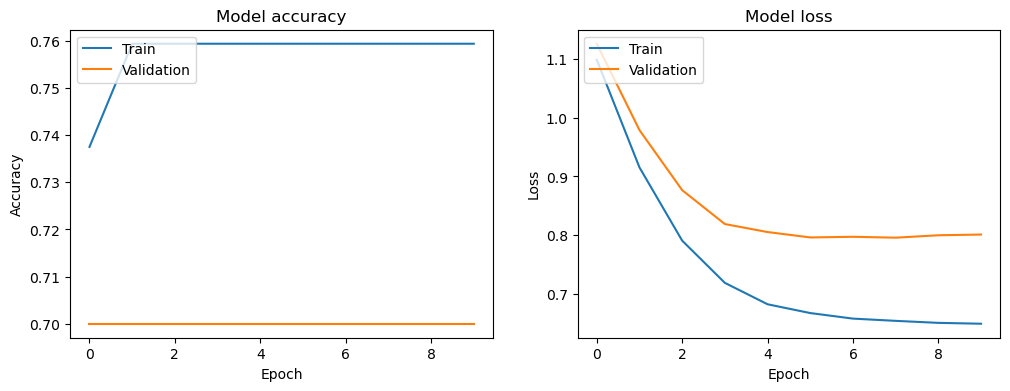

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
